<a href="https://colab.research.google.com/github/davidyaaw/mydataprojects/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BA%D0%B8%D0%BD%D0%BE%D1%84%D0%B8%D0%BB%D1%8C%D0%BC%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
data = pd.read_csv('movie_metadata.csv')
data.head() #read data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
data['profit'] = data['gross'] - data['budget'] #subtraction attributes. Now we know movie profit

In [ ]:
data.imdb_score.isnull().sum()

0

How many attributes in data frame?


In [ ]:
data.columns #all data attributes

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'profit'],
      dtype='object')

Now we make new table with attributes we need 


In [ ]:
dt = data[['genres','movie_title','language','title_year','imdb_score','duration','profit']] #make new data
dt.head() #show specific columns

,genres,movie_title,language,title_year,imdb_score,duration,profit
0,Action|Adventure|Fantasy|Sci-Fi,Avatar,English,2009.0,7.9,178.0,523505847.0
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,English,2007.0,7.1,169.0,9404152.0
2,Action|Adventure|Thriller,Spectre,English,2015.0,6.8,148.0,-44925825.0
3,Action|Thriller,The Dark Knight Rises,English,2012.0,8.5,164.0,198130642.0
4,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,7.1,NaN,NaN


In [ ]:
dt.shape

(5043, 7)

Split movies to new rows by their genres in cell


In [ ]:
s = dt['genres'].str.split('|').apply(Series, 1).stack() #split genres from the cell in column 'genres' with pointer '|' to 1 item in row.Make a list.stack delete Nans after apply operation
s.index = s.index.droplevel(-1) #index subtraction. row goes down
s.name = 'genres' #new genres
del dt['genres'] # del old  genres not splitted column from the beginning of table 
df = dt.join(s) #replace genres to the end of table OR join new splitted column of genres

In [ ]:
df.head()

,movie_title,language,title_year,imdb_score,duration,profit,genres
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Action
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Adventure
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Fantasy
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Sci-Fi
1,Pirates of the Caribbean: At World's End,English,2007.0,7.1,169.0,9404152.0,Action


In [ ]:
df.shape #data size X*Y

(14504, 7)

In [ ]:
df['genres'].unique() #unique genres 

array(['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller',
       'Documentary', 'Romance', 'Animation', 'Comedy', 'Family',
       'Musical', 'Mystery', 'Western', 'Drama', 'History', 'Sport',
       'Crime', 'Horror', 'War', 'Biography', 'Music', 'Game-Show',
       'Reality-TV', 'News', 'Short', 'Film-Noir'], dtype=object)

In [ ]:
len(df['genres'].unique()) #genres amount

26

Now we know amount of genres in df 

How much movies have imbd rating larger than 7?


In [ ]:
df1 = df[df['imdb_score']>=7] # filter imbd_scores which are larger than 7

In [ ]:
df1.head() #show them 

,movie_title,language,title_year,imdb_score,duration,profit,genres
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Action
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Adventure
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Fantasy
0,Avatar,English,2009.0,7.9,178.0,523505847.0,Sci-Fi
1,Pirates of the Caribbean: At World's End,English,2007.0,7.1,169.0,9404152.0,Action


In [ ]:
df2 = (pd.DataFrame(df1.groupby('genres').movie_title.nunique())).sort_values('movie_title', ascending=False ) #make new df and group by unique specific  genres  + show amount of movies in column 'movie titles'

In [ ]:
df2 #how many titles with specific genre have rating more than 7

,movie_title
genres,
Drama,1171
Comedy,456
Thriller,367
Romance,356
Crime,311
Adventure,302
Action,275
Biography,202
Sci-Fi,184


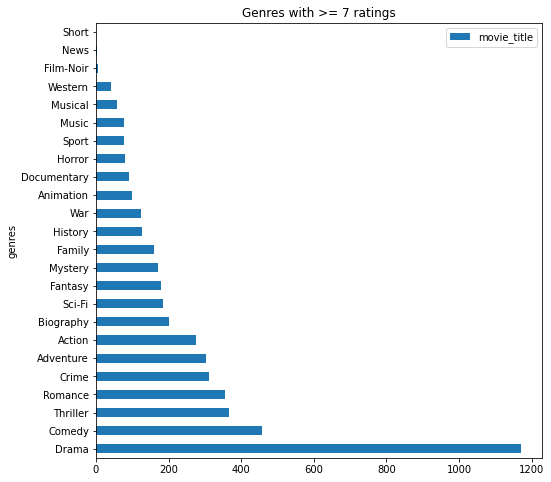

In [ ]:
df2[['movie_title']].plot.barh(stacked=True, title = 'Genres with >= 7 ratings', figsize=(8, 8)); #make a plot

Addiction between profit and genres. Drama movies prone to commercial success.

In [ ]:
df3 = df[['movie_title', 'profit','genres']] #make new dataframe from df with listed attributes

In [ ]:
df3.head()

,movie_title,profit,genres
0,Avatar,523505847.0,Action
0,Avatar,523505847.0,Adventure
0,Avatar,523505847.0,Fantasy
0,Avatar,523505847.0,Sci-Fi
1,Pirates of the Caribbean: At World's End,9404152.0,Action


In [ ]:
df3.loc[df3['genres'] == 'News'] #show all rows with genre News

,movie_title,profit,genres
2265,Capitalism: A Love Story,NaN,News
4348,The Square,NaN,News
4637,Food Chains,NaN,News


In [ ]:
df4 = df3.groupby(['genres']).mean() #create new dataframe with grouped by mean in column genres

In [ ]:
df4 #now we know amount of profit of definite genre

,profit
genres,
Action,5.326125e+06
Adventure,1.352746e+07
Animation,9.390523e+05
Biography,7.887722e+06
Comedy,8.207766e+06
Crime,8.842285e+05
Documentary,6.838890e+06
Drama,-3.166382e+06
Family,2.146984e+07


In [ ]:
df4['profit_million'] = df4['profit']/1000000 #mean numbers is too large , lets divide them to 1m and send result to new column 'profit_million'
del df4['profit'] #delete old 'profit' column with large values

In [ ]:
df4.sort_values('profit_million', ascending=False, inplace = True ) #sort by profit_millions with ascending from Max to Min values

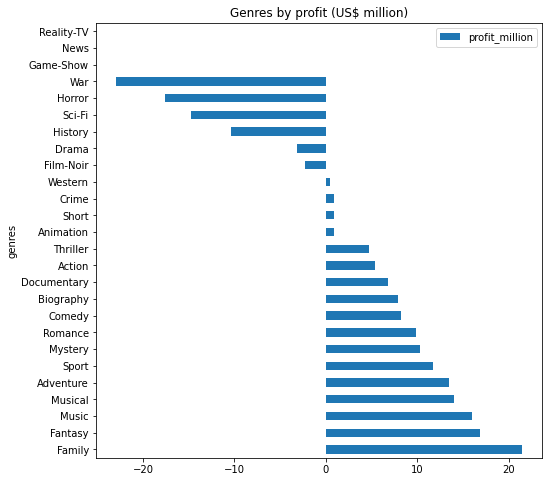

In [ ]:
df4[['profit_million']].plot.barh(stacked=True, title = 'Genres by profit (US$ million)', figsize=(8, 8));#make a plot which shows profitable genres

Now we know most stable profitable genres


In [ ]:
df5 = df[['movie_title', 'duration','genres']] #make new data frame from original df with listed names

In [ ]:
df5.head() #show them . now we can see movie_title,	duration and there genres

,movie_title,duration,genres
0,Avatar,178.0,Action
0,Avatar,178.0,Adventure
0,Avatar,178.0,Fantasy
0,Avatar,178.0,Sci-Fi
1,Pirates of the Caribbean: At World's End,169.0,Action


In [ ]:
df6 = df5.groupby(['genres']).mean() #make new data frame 'df6' from df5 grouped by genres with mean values of them
df6['average_duration']  = df6['duration'].round(2) #round by 2 symbols after point
del df6['duration'] #cause we have new rounded duration lets delete old from df6
df6.sort_values('average_duration', ascending=False, inplace = True ) #sort table by average_duration from Max to Min

In [ ]:
df6

,average_duration
genres,
History,137.05
War,131.43
Biography,125.02
Western,120.14
Drama,112.88
Adventure,112.03
Action,110.99
Sport,110.23
Musical,109.51


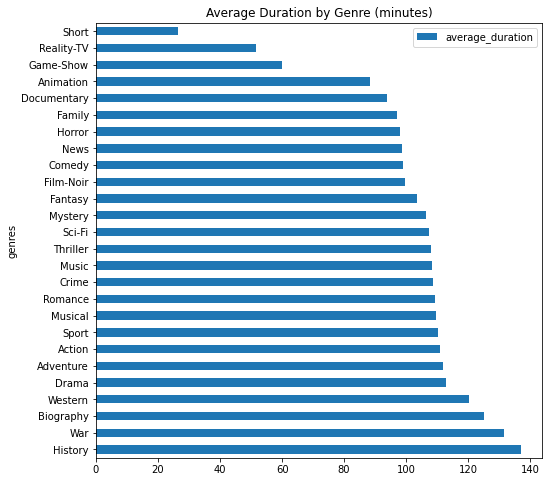

In [ ]:
df6[['average_duration']].plot.barh(stacked=True, title = 'Average Duration by Genre (minutes)', figsize=(8, 8)); #make a plot with default ascending = True .  which shows relations between film genres and average duration

Know we know that history movies are the longest in average

In [ ]:
df7 = df[['title_year','genres']] #make new data frame from original dataframe with listed attributes

In [ ]:
df7.head() #show them

,title_year,genres
0,2009.0,Action
0,2009.0,Adventure
0,2009.0,Fantasy
0,2009.0,Sci-Fi
1,2007.0,Action


In [ ]:
df7.shape #show size

(14504, 2)

Now we have all years log of genres . Let's filter them and find out HOW many genres were released after 2005

In [ ]:
df8 = df7[df7['title_year']>2005] #make new dataframe from df7 with attribute from df7 'title_year' which IS LARGER than 2005

In [ ]:
df8.shape #size of new dataframe'df8' . Now we know 

(6848, 2)

How many Thrillers? How Many Thrillers each year from 2005?

In [ ]:
df9 = df8[df8['genres'] == 'Thriller'] # make new dataframe from dataframe 'df8' with attribute 'genres' from df8 which equel 'Triller'

In [ ]:
df9.shape #dataframe size .Now we know amount of Trillers .  

(687, 2)

In [ ]:
df10 = df9.groupby(['title_year']).count() #make new dataframe from datafram 'df10' . Group df by title_year and count numbers of Thrillers .

In [ ]:
df10 #Now we know how much Thrillers were done in definite year

,genres
title_year,
2006.0,62
2007.0,55
2008.0,56
2009.0,69
2010.0,60
2011.0,67
2012.0,65
2013.0,68
2014.0,80


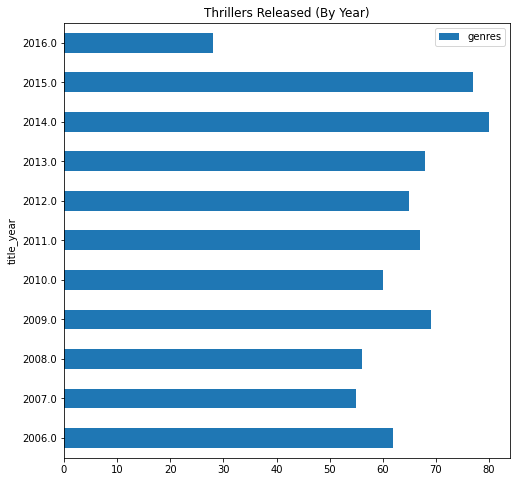

In [ ]:
df10[['genres']].plot.barh(stacked=True, title = 'Thrillers Released (By Year)', figsize=(8, 8)); #Thrillers released by year

How many Mystery movies? How many Mystery movies from 2005?

In [ ]:
df11 = df8[df8['genres'] == 'Mystery'] #make new dataframe df11 from dataframe 'df8' with attribute 'genres' which equel 'Mystery'

In [ ]:
df11.shape #size . Now we know amount of Mystery movies from df11

(235, 2)

In [ ]:
df12 = df11.groupby(['title_year']).count() # group by title year ' How much Mystery movies released in definite year

In [ ]:
df12 #now we know

,genres
title_year,
2006.0,23
2007.0,21
2008.0,20
2009.0,33
2010.0,18
2011.0,24
2012.0,17
2013.0,13
2014.0,28


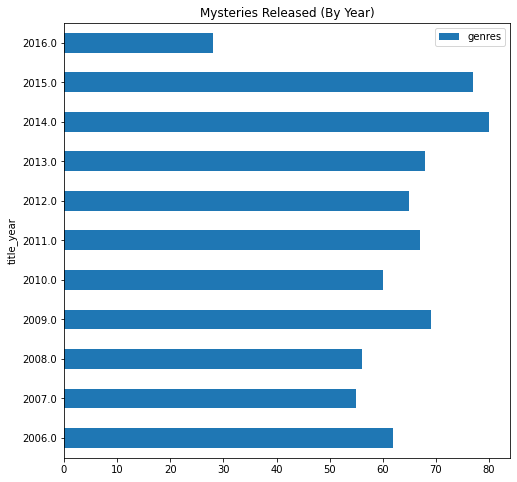

In [ ]:
df10[['genres']].plot.barh(stacked=True, title = 'Mysteries Released (By Year)', figsize=(8, 8)); #plot

Now we know that 2014 was 'Mystery YEAR'. Mystery genre have a great growth from 2006 to 2015. In 2016 mystery genre wasn't popular